In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
data = np.load("my_comp_train_XY.npz")
X = data["X"]
y = data["y"]

## Split train and test data

In [6]:
X = X.reshape(X.shape[0], -1)
# split train and test data(ratio 0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Classification

### Linear SVM(no scale)

In [12]:
# first LinearSVC with cross validation
linsvc_clf = LinearSVC()
cross_val_score(linsvc_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.86393997, 0.83722273, 0.84447926])

In [14]:
# accuracy score
y_linsvc_train_pred = cross_val_predict(linsvc_clf, X_train, y_train, cv=3)
accuracy_score_linsvc_train = accuracy_score(y_linsvc_train_pred, y_train)
print(accuracy_score_linsvc_train)

C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.861878453038674


C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
# confusion matrix
matric_linsvc_train = confusion_matrix(y_train, y_linsvc_train_pred)
matric_linsvc_train

array([[3121,    1,   45,   24,    5,   15,   30,    7,   64,    5],
       [   1, 2539,   26,   17,    3,   13,    7,    7,   79,    5],
       [  33,   65, 3689,  141,   41,   17,   56,   78,  151,   18],
       [  20,   19,  180, 3319,   10,  119,   12,   50,  117,   77],
       [   4,   20,   72,   20, 2827,   12,   32,   39,   55,  190],
       [  37,   11,   49,  245,   47, 1842,   74,   21,  196,   80],
       [  44,   11,  104,   12,   40,   58, 3929,    6,   54,    3],
       [  11,   15,   74,   24,   41,    7,    2, 3570,   37,  228],
       [  33,   62,  134,  261,   46,  107,   40,   39, 3784,  175],
       [  10,    8,   48,   56,  119,   31,    3,  244,   76, 2736]],
      dtype=int64)

<AxesSubplot:>

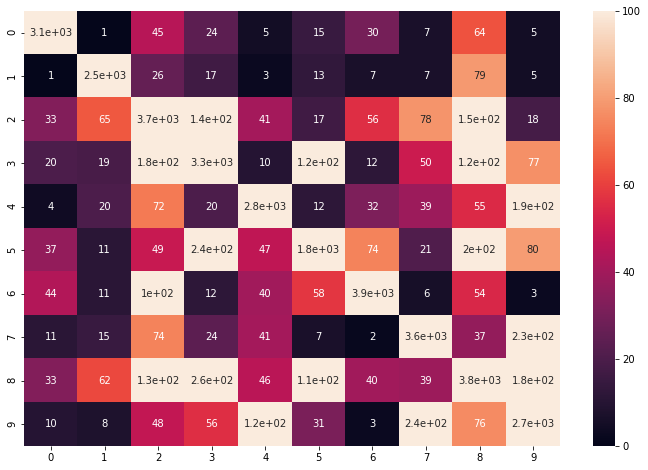

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(matric_linsvc_train, annot=True, vmin=0, vmax=100)

### LinearSVM(0 to 1 scaled)

In [74]:
X_train_scaled = X_train/255.0

In [76]:
# LinearSVC with cross validation
linsvc_clf = LinearSVC()
cross_val_score(linsvc_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.90690195, 0.90409829, 0.90401583])

In [77]:
# accuracy score
y_linsvc_train_scaled_pred = cross_val_predict(linsvc_clf, X_train_scaled, y_train, cv=3)
accuracy_score_linsvc_train_scaled = accuracy_score(y_linsvc_train_scaled_pred, y_train)
print(accuracy_score_linsvc_train_scaled)

C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9047304911904566


C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [80]:
# confusion matrix value
matric_linsvc_train_scaled = confusion_matrix(y_train, y_linsvc_train_scaled_pred)
matric_linsvc_train_scaled

array([[3194,    0,   22,   12,    4,   16,   28,    3,   34,    4],
       [   1, 2603,   20,    5,    1,   13,    5,    6,   39,    4],
       [  37,   49, 3811,   77,   48,   17,   55,   62,  122,   11],
       [  21,   17,  127, 3444,   12,  118,   11,   37,   97,   39],
       [   4,   18,   26,    5, 2986,    8,   34,   14,   42,  134],
       [  28,   11,   21,  116,   37, 2165,   66,   16,  102,   40],
       [  33,    8,   39,    4,   20,   48, 4064,    5,   38,    2],
       [   8,   16,   48,   18,   43,   13,    6, 3721,   21,  115],
       [  41,   79,   68,  130,   41,  105,   51,   26, 4064,   76],
       [  16,   10,   14,   69,  140,   29,    2,  140,   48, 2863]],
      dtype=int64)

<AxesSubplot:>

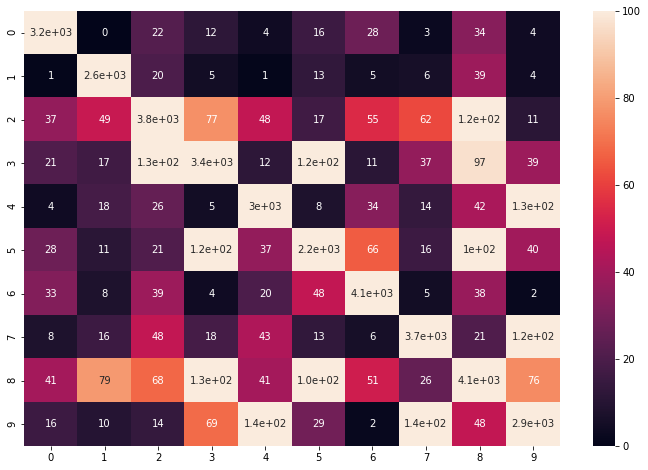

In [81]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_linsvc_train_scaled, annot=True, vmin=0, vmax=100)

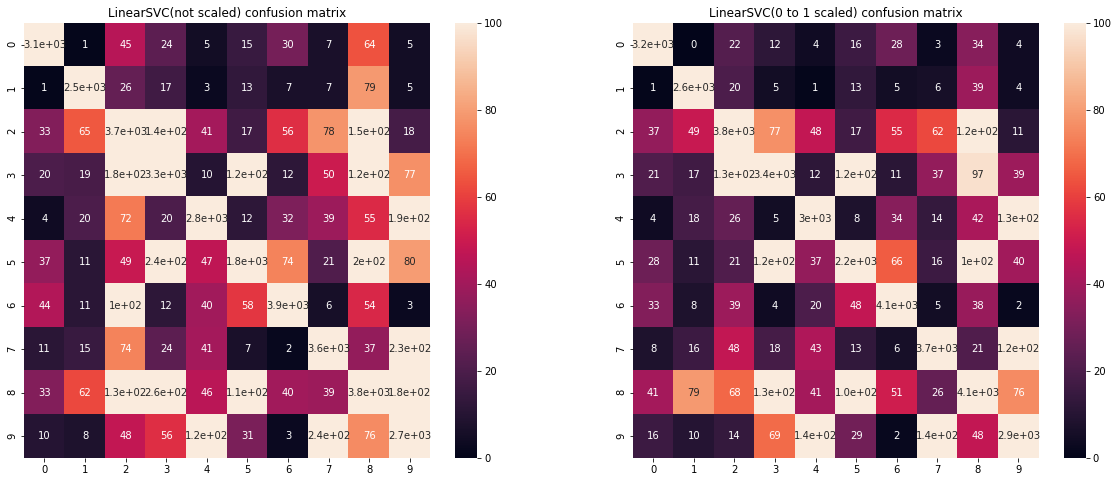

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

map_min, map_max = 0, 100
sns.heatmap(matric_linsvc_train, annot=True, vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matric_linsvc_train_scaled, annot=True, vmin=map_min, vmax=map_max, ax=axs[1])
axs[0].set_title("LinearSVC(not scaled) confusion matrix")
axs[1].set_title("LinearSVC(0 to 1 scaled) confusion matrix")
plt.show()

#### observation
X_train scaled is better

### LinearSVM with gridSearch

In [92]:
# grid search parameter
param_grid = [
     {"C": [0.001, 0.005 ,0.01, 0.05, 0.1, 1]} # regularization term
]

In [93]:
linsvc_clf_gs = GridSearchCV(linsvc_clf, param_grid, verbose=2, cv=3)
linsvc_clf_gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............................................C=0.001; total time=   2.0s
[CV] END ............................................C=0.001; total time=   2.3s
[CV] END ............................................C=0.001; total time=   2.2s
[CV] END ............................................C=0.005; total time=   2.8s
[CV] END ............................................C=0.005; total time=   2.8s
[CV] END ............................................C=0.005; total time=   3.0s
[CV] END .............................................C=0.01; total time=   4.1s
[CV] END .............................................C=0.01; total time=   3.3s
[CV] END .............................................C=0.01; total time=   3.4s
[CV] END .............................................C=0.05; total time=  11.1s
[CV] END .............................................C=0.05; total time=  10.7s
[CV] END ........................................

C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ................................................C=1; total time=  43.5s


C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ................................................C=1; total time=  42.9s


C:\Users\FYOSHIAKI\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ................................................C=1; total time=  40.1s


GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1]}], verbose=2)

In [94]:
linsvc_clf_gs.cv_results_

{'mean_fit_time': array([ 2.23874044,  2.92634654,  3.64725057, 10.84200939, 18.40818858,
        42.19988092]),
 'std_fit_time': array([0.11941503, 0.06368691, 0.34531092, 0.23145701, 1.41468532,
        1.48514197]),
 'mean_score_time': array([0.04663181, 0.03756563, 0.03886724, 0.03623668, 0.03856349,
        0.03690211]),
 'std_score_time': array([0.00449273, 0.00124328, 0.00668408, 0.00248844, 0.00169459,
        0.00282036]),
 'param_C': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.005},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 1}],
 'split0_test_score': array([0.8967593 , 0.90706688, 0.90846871, 0.9107776 , 0.91044776,
        0.90681949]),
 'split1_test_score': array([0.89634699, 0.90574751, 0.90879855, 0.90879855, 0.9076441 ,
        0.90442814]),
 'split2_test_score': array([0.89667684, 0.90690195, 0.9087985

In [105]:
params = linsvc_clf_gs.cv_results_['params']
accuracy_list = linsvc_clf_gs.cv_results_['mean_test_score']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["acc"] = accuracy
    result_list.append(param)

In [106]:
result_list

[{'C': 0.001, 'test_acc': 0.8965943761853715, 'acc': 0.8965943761853715},
 {'C': 0.005, 'test_acc': 0.9065721118166076, 'acc': 0.9065721118166076},
 {'C': 0.01, 'test_acc': 0.9086886011929304, 'acc': 0.9086886011929304},
 {'C': 0.05, 'test_acc': 0.9093207993183254, 'acc': 0.9093207993183254},
 {'C': 0.1, 'test_acc': 0.9086061405678789, 'acc': 0.9086061405678789},
 {'C': 1, 'test_acc': 0.9051153074406971, 'acc': 0.9051153074406971}]

In [107]:
df_result_list = pd.DataFrame(result_list)
df_result_list

,C,test_acc,acc
0,0.001,0.896594,0.896594
1,0.005,0.906572,0.906572
2,0.010,0.908689,0.908689
3,0.050,0.909321,0.909321
4,0.100,0.908606,0.908606
5,1.000,0.905115,0.905115


<AxesSubplot:xlabel='C', ylabel='acc'>

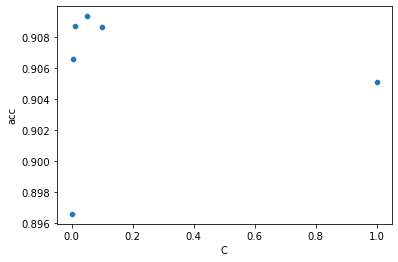

In [108]:
sns.scatterplot(data=df_result_list, x="C", y="acc")

#### observation
regularization term C = 0.05 is best

### SVM classifier

In [110]:
# svm classifier(RBF kernel) with cross validation
svc_clf = SVC(kernel="rbf", C=0.05)
cross_val_score(svc_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.93469118, 0.93081554, 0.93221737])

In [57]:
svc_clf_gs_cv.fit(X_train_svc, y_train_svc)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..................................C=1.0, gamma=0.01; total time=   9.7s
[CV] END ..................................C=1.0, gamma=0.01; total time=   9.3s
[CV] END ..................................C=1.0, gamma=0.01; total time=   9.7s
[CV] END ...................................C=1.0, gamma=0.1; total time=   9.5s
[CV] END ...................................C=1.0, gamma=0.1; total time=   9.2s
[CV] END ...................................C=1.0, gamma=0.1; total time=  10.7s
[CV] END ...................................C=1.0, gamma=1.0; total time=  10.3s
[CV] END ...................................C=1.0, gamma=1.0; total time=  11.6s
[CV] END ...................................C=1.0, gamma=1.0; total time=  10.4s
[CV] END .................................C=10.0, gamma=0.01; total time=   9.8s
[CV] END .................................C=10.0, gamma=0.01; total time=  10.8s
[CV] END .................................C=10.0,

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid=[{'C': [1.0, 10.0, 100.0], 'gamma': [0.01, 0.1, 1.0]}],
             verbose=2)

In [58]:
svc_clf_gs_cv.best_score_

0.1286421304949951

In [59]:
svc_clf_gs_cv.best_params_

{'C': 1.0, 'gamma': 0.01}

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_svc.astype(np.float32))

In [63]:
svc_clf_gs_cv.fit(X_train_scaled, y_train_svc)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..................................C=1.0, gamma=0.01; total time=   8.8s
[CV] END ..................................C=1.0, gamma=0.01; total time=  10.3s
[CV] END ..................................C=1.0, gamma=0.01; total time=   8.8s
[CV] END ...................................C=1.0, gamma=0.1; total time=   9.0s
[CV] END ...................................C=1.0, gamma=0.1; total time=   9.6s
[CV] END ...................................C=1.0, gamma=0.1; total time=   8.8s
[CV] END ...................................C=1.0, gamma=1.0; total time=   9.1s
[CV] END ...................................C=1.0, gamma=1.0; total time=   9.1s
[CV] END ...................................C=1.0, gamma=1.0; total time=   9.3s
[CV] END .................................C=10.0, gamma=0.01; total time=   8.1s
[CV] END .................................C=10.0, gamma=0.01; total time=   8.1s
[CV] END .................................C=10.0,

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid=[{'C': [1.0, 10.0, 100.0], 'gamma': [0.01, 0.1, 1.0]}],
             verbose=2)

In [64]:
svc_clf_gs_cv.best_score_

0.6764660802436385

In [65]:
svc_clf_gs_cv.best_params_

{'C': 10.0, 'gamma': 0.01}